### Criar um modelo preditivo de preço para apartamentos na cidade de Porto Alegre

In [372]:
import numpy as np
import time
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("always")

In [373]:
# leitura da base de dados
df = pd.read_csv('2018-08-06-foxter.csv', sep='\t', decimal=',')

# total of rows
df.shape[0]

19868

In [374]:
df

Unnamed: 0      id       price       area  \
0               0  176703    85000.00      31.39   
1               1  175795   445000.00     100.10   
2               2  176594   414000.00      87.00   
3               3  153614   865000.00     113.57   
4               4  173456  1200000.00     293.00   
5               5  176401   100000.00      18.61   
6               6  164510    95000.00      45.00   
7               7  176202   424000.00     133.98   
8               8  166441   200000.00      51.00   
9               9  167536   155000.00      47.35   
10             10  176334   400000.00      90.00   
11             11  176287   160000.00      26.57   
12             12  176098   200000.00      43.00   
13             13  176197   450000.00     185.00   
14             14  176162   700000.00     201.00   
15             15  163763   185000.00     367.25   
16             16  176108   255000.00      51.00   
17             17  137292   432500.00     450.00   
18             18  176023   290000.00      66.51   
19             19  175987   600000.00     106.00   
20             20  172555   490000.00     258.00   
21             21  175846   380000.00      85.00   
22             22  176637   370000.00     111.11   
23             23  175915   680000.00     159.87   
24             24  175873   450000.00      38.58   
25             25  175822   270000.00      60.00   
26             26  175755  1100000.00     260.00   
27             27  175245  1450000.00     513.00   
28             28  175656   950000.00     108.00   
29             29  175587   450000.00      96.00   
30             30  175574   174900.00      66.00   
31             31  175981  1330000.00     167.76   
32             32  175385   459000.00     120.25   
33             33  175062   120000.00      31.70   
34             34  175445   320000.00     101.74   
35             35  137537   340000.00     115.00   
36             36  161244   170000.00      39.35   
37             37  174216   200000.00      59.37   
38             38  175158   390000.00      87.10   
39             39  175274     8300.00        nan   
40             40  175100   200000.00     360.00   
41             41  175234   780000.00     212.00   
42             42  175202   410000.00      60.61   
43             43  154630   320000.00      57.00   
44             44  175103   360000.00     110.00   
45             45  175155   490000.00      37.08   
46             46  175021   240000.00      45.20   
47             47  176516   180000.00      59.17   
48             48  145115   375000.00      57.00   
49             49  174030   750000.00     151.00   
50             50  174609   230000.00      90.00   
51             51  174609   230000.00      90.00   
52             52  138381   318000.00     107.00   
53             53  174802   350000.00      82.58   
54             54  174910   310000.00     111.50   
55             55  172934   165000.00      51.89   
56             56  174302  1350000.00     209.07   
57             57  174487  2600000.00     288.56   
58             58  143758   413419.00      49.18   
59             59  165543   450000.00      59.53   
60             60  174542   349000.00      68.00   
61             61  173671  1680000.00     200.00   
62             62  174593    51000.00        nan   
63             63  173894   340000.00      83.90   
64             64  167635   237750.00      60.70   
65             65  176608   426000.00      98.70   
66             66  176585   178000.00      48.42   
67             67  153790   449000.00     186.00   
68             68  168789   215000.00      44.00   
69             69  176377   180000.00      50.50   
70             70  176422   475000.00      76.75   
71             71  176368   280000.00      84.84   
72             72  176300   255000.00      41.30   
73             73  176100   430000.00      91.89   
74             74  176218   110000.00      27.00   
75             75  176198    47000.00      12.00   
76 

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19868 entries, 0 to 19867
Data columns (total 14 columns):
Unnamed: 0     19868 non-null int64
id             19868 non-null int64
price          19794 non-null float64
area           19817 non-null float64
district       19866 non-null object
city           19868 non-null object
type           19868 non-null object
segment        19198 non-null object
condominium    12795 non-null float64
iptu           14578 non-null float64
rooms          19868 non-null object
box            18750 non-null float64
url            19868 non-null object
date           19868 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 2.1+ MB


In [376]:

df.iat[11359,5] = 'Porto Alegre'

In [377]:
df.loc[11359]

Unnamed: 0                                                 11359
id                                                        155515
price                                                  795000.00
area                                                      119.29
district                                             Auxiliadora
city                                                Porto Alegre
type                                                 Apartamento
segment                                              Residencial
condominium                                               650.00
iptu                                                     2100.00
rooms                                                          3
box                                                         2.00
url            http://www.foxterciaimobiliaria.com.br/imovel/...
date                                                  2018-08-06
Name: 11359, dtype: object

In [378]:
df.loc[df.id == 155515]


Unnamed: 0      id     price   area     district          city  \
11359       11359  155515 795000.00 119.29  Auxiliadora  Porto Alegre   

              type      segment  condominium    iptu rooms  box  \
11359  Apartamento  Residencial       650.00 2100.00     3 2.00   

                                                     url        date  
11359  http://www.foxterciaimobiliaria.com.br/imovel/...  2018-08-06

In [379]:
#retirar outros segmentos que não sejam o residencial
df.groupby(['segment']).count()

Unnamed: 0     id  price   area  district   city  \
segment                                                                    
Comercial                     1723   1723   1722   1719      1723   1723   
Comercial, Residencial        1069   1069   1062   1058      1069   1069   
Residencial                  16406  16406  16341  16372     16404  16406   

                         type  condominium   iptu  rooms    box    url   date  
segment                                                                        
Comercial                1723          942   1043   1723   1408   1723   1723  
Comercial, Residencial   1069           56    673   1069    766   1069   1069  
Residencial             16406        11484  12324  16406  15988  16406  16406

In [380]:
df = df.drop(df.query('(segment != "Residencial")').index)
df.groupby(['segment']).count()

Unnamed: 0     id  price   area  district   city   type  \
segment                                                                
Residencial       16406  16406  16341  16372     16404  16406  16406   

             condominium   iptu  rooms    box    url   date  
segment                                                      
Residencial        11484  12324  16406  15988  16406  16406

In [381]:
#manter somente os apartamentos
df.groupby(['type']).count()

Unnamed: 0     id  price   area  district   city  segment  \
type                                                                     
Apartamento       10385  10385  10340  10381     10385  10385    10385   
Box                  18     18     18     18        18     18       18   
Casa               3968   3968   3954   3951      3968   3968     3968   
Cobertura           886    886    883    886       886    886      886   
Depósito              1      1      1      1         1      1        1   
Flat                110    110    110    109       110    110      110   
Loft                166    166    165    165       166    166      166   
Loja                 20     20     20     20        20     20       20   
Lote                 63     63     62     53        63     63       63   
Prédio                7      7      7      7         7      7        7   
Rural                21     21     21     21        21     21       21   
Sala                 30     30     30     30        30     30       30   
Terreno             731    731    730    730       729    731      731   

             condominium  iptu  rooms    box    url   date  
type                                                        
Apartamento         8705  7892  10385  10373  10385  10385  
Box                   17     9     18     14     18     18  
Casa                1438  3030   3968   3964   3968   3968  
Cobertura            802   674    886    886    886    886  
Depósito               0     0      1      1      1      1  
Flat                  56    33    110    107    110    110  
Loft                 124   118    166    162    166    166  
Loja                   5     5     20     14     20     20  
Lote                  42    58     63      1     63     63  
Prédio                 1     4      7      6      7      7  
Rural                  0    14     21     18     21     21  
Sala                  24    20     30     26     30     30  
Terreno              270   467    731    416    731    731

In [382]:
#df = df.drop(df.query('(type != "Apartamento" and type != "Cobertura")').index)
df = df.drop(df.query('(type != "Apartamento")').index)
df.groupby(['type']).count()

Unnamed: 0     id  price   area  district   city  segment  \
type                                                                     
Apartamento       10385  10385  10340  10381     10385  10385    10385   

             condominium  iptu  rooms    box    url   date  
type                                                        
Apartamento         8705  7892  10385  10373  10385  10385

In [383]:
#retirar a coluna 'Unnamed: 0' caso ela ainda exista
#retirar iptu porque tem muitos NaN e ficou com correlação alta com o preço
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['iptu'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10385 entries, 0 to 19860
Data columns (total 12 columns):
id             10385 non-null int64
price          10340 non-null float64
area           10381 non-null float64
district       10385 non-null object
city           10385 non-null object
type           10385 non-null object
segment        10385 non-null object
condominium    8705 non-null float64
rooms          10385 non-null object
box            10373 non-null float64
url            10385 non-null object
date           10385 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [384]:
#limpar a variável rooms
df.groupby(['rooms']).count()

id  price  area  district  city  type  segment  \
rooms                                                                       
\n 0\n 1\n 2\n 3\n 4+\n    31     29    29        31    31    31       31   
1                        1607   1604  1607      1607  1607  1607     1607   
2                        4870   4851  4869      4870  4870  4870     4870   
3                        3674   3655  3673      3674  3674  3674     3674   
4                         191    189   191       191   191   191      191   
5                          10     10    10        10    10    10       10   
6                           2      2     2         2     2     2        2   

                         condominium   box   url  date  
rooms                                                   
\n 0\n 1\n 2\n 3\n 4+\n           28    31    31    31  
1                               1350  1604  1607  1607  
2                               4031  4863  4870  4870  
3                               3124  3672  3674  3674  
4                                164   191   191   191  
5                                  7    10    10    10  
6                                  1     2     2     2

In [385]:
# errors='coerce' o que não puder ser transformado vai virar NaN
df['rooms'] = pd.to_numeric(df['rooms'], downcast='integer', errors='coerce')
df.groupby(['rooms']).count()

id  price  area  district  city  type  segment  condominium   box  \
rooms                                                                        
1.00   1607   1604  1607      1607  1607  1607     1607         1350  1604   
2.00   4870   4851  4869      4870  4870  4870     4870         4031  4863   
3.00   3674   3655  3673      3674  3674  3674     3674         3124  3672   
4.00    191    189   191       191   191   191      191          164   191   
5.00     10     10    10        10    10    10       10            7    10   
6.00      2      2     2         2     2     2        2            1     2   

        url  date  
rooms              
1.00   1607  1607  
2.00   4870  4870  
3.00   3674  3674  
4.00    191   191  
5.00     10    10  
6.00      2     2

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10385 entries, 0 to 19860
Data columns (total 12 columns):
id             10385 non-null int64
price          10340 non-null float64
area           10381 non-null float64
district       10385 non-null object
city           10385 non-null object
type           10385 non-null object
segment        10385 non-null object
condominium    8705 non-null float64
rooms          10354 non-null float64
box            10373 non-null float64
url            10385 non-null object
date           10385 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.0+ MB


In [387]:
#df['box'].value_counts(dropna=False)

In [388]:
# Convertendo as variáveis para os formatos corretos

df['date'] = pd.to_datetime(df['date'])

df['box'] = pd.to_numeric(df['box'], downcast='integer', errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10385 entries, 0 to 19860
Data columns (total 12 columns):
id             10385 non-null int64
price          10340 non-null float64
area           10381 non-null float64
district       10385 non-null object
city           10385 non-null object
type           10385 non-null object
segment        10385 non-null object
condominium    8705 non-null float64
rooms          10354 non-null float64
box            10373 non-null float64
url            10385 non-null object
date           10385 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 1.0+ MB


In [389]:
# removendo todos os NaN
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8668 entries, 0 to 19860
Data columns (total 12 columns):
id             8668 non-null int64
price          8668 non-null float64
area           8668 non-null float64
district       8668 non-null object
city           8668 non-null object
type           8668 non-null object
segment        8668 non-null object
condominium    8668 non-null float64
rooms          8668 non-null float64
box            8668 non-null float64
url            8668 non-null object
date           8668 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 880.3+ KB


In [390]:
#manter apenas a cidade de Porto Alegre
df.groupby(['city']).count()

id  price  area  district  type  segment  condominium  \
city                                                                          
Alvorada              18     18    18        18    18       18           18   
Balneário Camboriú     1      1     1         1     1        1            1   
Bento Gonçalves        2      2     2         2     2        2            2   
Cachoeirinha          40     40    40        40    40       40           40   
Canela                 4      4     4         4     4        4            4   
Canoas               295    295   295       295   295      295          295   
Capão Novo             1      1     1         1     1        1            1   
Capão da Canoa        36     36    36        36    36       36           36   
Caxias do Sul          8      8     8         8     8        8            8   
Cidreira               2      2     2         2     2        2            2   
Esteio                11     11    11        11    11       11           11   
Florianópolis          4      4     4         4     4        4            4   
Gramado               34     34    34        34    34       34           34   
Gravataí              13     13    13        13    13       13           13   
Itapema                1      1     1         1     1        1            1   
Novo Hamburgo         16     16    16        16    16       16           16   
Pelotas                1      1     1         1     1        1            1   
Porto Alegre        8071   8071  8071      8071  8071     8071         8071   
Rio Grande             1      1     1         1     1        1            1   
Santa Catarina         1      1     1         1     1        1            1   
Santa Maria            2      2     2         2     2        2            2   
Sapucaia do Sul        4      4     4         4     4        4            4   
São Leopoldo          16     16    16        16    16       16           16   
Torres                17     17    17        17    17       17           17   
Tramandaí             31     31    31        31    31       31           31   
Viamão                 1      1     1         1     1        1            1   
Xangri-Lá             31     31    31        31    31       31           31   
Xangri-lá              6      6     6         6     6        6            6   

                    rooms   box   url  date  
city                                         
Alvorada               18    18    18    18  
Balneário Camboriú      1     1     1     1  
Bento Gonçalves         2     2     2     2  
Cachoeirinha           40    40    40    40  
Canela                  4     4     4     4  
Canoas                295   295   295   295  
Capão Novo              1     1     1     1  
Capão da Canoa         36    36    36    36  
Caxias do Sul           8     8     8     8  
Cidreira                2     2     2     2  
Esteio                 11    11    11    11  
Florianópolis           4     4     4     4  
Gramado                34    34    34    34  
Gravataí               13    13    13    13  
Itapema                 1     1     1     1  
Novo Hamburgo          16    16    16    16  
Pelotas                 1     1     1     1  
Porto Alegre         8071  8071  8071  8071  
Rio Grande              1     1     1     1  
Santa Catarina          1     1     1     1  
Santa Maria             2     2     2     2  
Sapucaia do Sul         4     4     4     4  
São Leopoldo           16    16    16    16  
Torres                 17    17    17    17  
Tramandaí              31    31    31    31  
Viamão                  1     1     1     1  
Xangri-Lá              31    31    31    31  
Xangri-lá               6     6     6     6

In [391]:
df = df.drop(df.query('(city != "Porto Alegre")').index)
df.groupby(['city']).count()

id  price  area  district  type  segment  condominium  rooms  \
city                                                                           
Porto Alegre  8071   8071  8071      8071  8071     8071         8071   8071   

               box   url  date  
city                            
Porto Alegre  8071  8071  8071

In [392]:
pd.pivot_table(df, index=['district'], aggfunc=[np.mean], values=['area', 'price'])

mean           
                          area      price
district                                 
Aberta dos Morros        54.48  211733.33
Agronomia                50.42  220782.76
Alto Petrópolis          52.52  225433.33
Auxiliadora             126.20 1128398.23
Azenha                   62.61  358518.33
Bela Vista              155.68 1487439.79
Boa Vista                90.98  635569.47
Bom Fim                  88.82  512419.13
Bom Jesus                60.51  318524.37
Camaquã                  57.78  558868.15
Campo Novo               53.43  232000.00
Cascata                  56.55  233770.00
Cavalhada                64.79  327867.79
Centro                   51.99  521400.00
Centro Histórico         74.40  365021.12
Chácara das Pedras       96.82  651675.38
Cidade Baixa             69.85  391168.24
Coronel Aparício Borges  58.20  222500.00
Cristal                  68.57  360718.80
Cristo Redentor          77.90  429617.69
Espírito Santo           55.30  272000.00
Farrapos                 53.42  278358.75
Farroupilha             173.43  446360.31
Floresta                 82.29  437561.09
Glória                   57.80  327256.86
Guarujá                  59.78  259625.00
Higienópolis            103.94  713546.45
Hipica                   54.27  233309.33
Humaita                  50.54  310000.00
Humaitá                  58.93  254650.13
Hípica                   49.01  226666.67
Independência           119.62  695946.79
Ipanema                  72.56  363298.18
Jardim Botânico          71.47  445934.38
Jardim Carvalho          66.09  361205.00
Jardim Europa           144.43 1664177.42
Jardim Floresta          61.67  348590.91
Jardim Isabel           261.00  999000.00
Jardim Itu Sabará       116.18  390295.25
Jardim Itu-Sabará        73.29  425624.92
Jardim Leopoldina        47.64  166957.14
Jardim Lindoia           79.10  600485.54
Jardim Lindóia           97.74  593448.15
Jardim Sao Pedro         70.19  310950.00
Jardim São Pedro         83.44  435375.00
Jardim do Salso          85.05  624218.41
Lomba do Pinheiro        41.55  140833.33
Medianeira               69.39  334389.33
Menino Deus              78.46  550108.50
Moinhos de Vento        161.54 1340772.36
Mont Serrat             110.33  886442.27
Mont'Serrat             125.67  901000.00
Morro Santana            49.62  199475.00
Mário Quintana           43.25  207500.00
Navegantes               69.25  285064.05
Nonoai                   65.25  266166.67
Parque Santa Fé          46.93  157045.45
Partenon                 62.61  321833.10
Passo d'Areia            78.37  541056.25
Passo da Areia           72.95  494736.56
Passo das Pedras         52.69  238730.33
Paternon                 55.99  298250.00
Pedra Redonda           138.37 1203000.00
Petrópolis               95.09  724068.83
Praia de Belas           64.30  367329.33
Protásio Alves           53.30  227380.10
Restinga                 44.68  126052.94
Rio Branco              107.82  694756.79
Rubem Berta              47.83  155133.33
Santa Cecilia            91.53  526666.67
Santa Cecília            88.70  556900.00
Santa Maria Goretti      70.99  324945.00
Santa Teresa             71.47  392433.33
Santa Tereza             79.06  403967.29
Santana                  74.12  432239.78
Santo Antônio            58.69  282366.81
Sarandi                  60.09  280950.53
São Geraldo              72.35  397555.06
São José                 51.25  252779.17
São João                 86.00  521474.98
São Sebastião            62.00  293455.87
Teresópolis              67.22  337382.77
Tristeza                 78.92  511465.97
Três Figueiras          116.17 1255419.89
Vila Assunção           115.77  586480.00
Vila Conceição           64.67  394189.22
Vila Ipiranga            73.88  464420.84
Vila Jardim              75.96  555640.20
Vila João Pessoa         94.27  382500.00
Vila Nova                52.36  210920.77
hipica                   45.47  222500.00

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8071 entries, 3 to 19860
Data columns (total 12 columns):
id             8071 non-null int64
price          8071 non-null float64
area           8071 non-null float64
district       8071 non-null object
city           8071 non-null object
type           8071 non-null object
segment        8071 non-null object
condominium    8071 non-null float64
rooms          8071 non-null float64
box            8071 non-null float64
url            8071 non-null object
date           8071 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 819.7+ KB


In [394]:
#total de elementos únicos e repetidos

print ("total de elementos: " + str(df.shape[0]))
print ("total de elemento únicos: " + str(df.id.nunique()))
print ("elementos repetidos: " + str(df.shape[0] - df.id.nunique()))

total de elementos: 8071
total de elemento únicos: 8065
elementos repetidos: 6


In [395]:
#apagar duplicados
df = df.drop_duplicates(subset=['id'])
print ("elementos repetidos: " + str(df.shape[0] - df.id.nunique()))

elementos repetidos: 0


In [396]:
#identificar duplicados

_ = df[df.duplicated(['id'], keep=False)]['id']
_.sort_values()


Series([], Name: id, dtype: int64)

In [397]:
#quantidade de missing values

_ = df.isnull().sum(axis=0) 
print ("quantidade de missing values: "+str(_.sum()))

quantidade de missing values: 0


In [398]:
pd.options.display.max_rows = 4000

In [399]:
#identificar bairros
df['district'].value_counts().sort_index()

Aberta dos Morros            9
Agronomia                   34
Alto Petrópolis             21
Auxiliadora                203
Azenha                      88
Bela Vista                 175
Boa Vista                  110
Bom Fim                    115
Bom Jesus                   51
Camaquã                     99
Campo Novo                   4
Cascata                     10
Cavalhada                  163
Centro                       5
Centro Histórico           372
Chácara das Pedras          65
Cidade Baixa               137
Coronel Aparício Borges      6
Cristal                    266
Cristo Redentor            160
Espírito Santo               1
Farrapos                     4
Farroupilha                 65
Floresta                   145
Glória                      43
Guarujá                      8
Higienópolis               142
Hipica                       3
Humaita                      1
Humaitá                     89
Hípica                       3
Independência              119
Ipanema 

In [400]:
# Corrigir os nomes dos bairros errados
df['district'] = df['district'].replace("Mont'Serrat", "Mont Serrat")
df['district'] = df['district'].replace('Humaita', "Humaitá")
df['district'] = df['district'].replace('Jardim Itu Sabará', "Jardim Itu-Sabará")
df['district'] = df['district'].replace('Jardim Lindoia', "Jardim Lindóia")
df['district'] = df['district'].replace('Jardim Sao Pedro', "Jardim São Pedro")
df['district'] = df['district'].replace('Passo da Areia', "Passo d'Areia")
df['district'] = df['district'].replace('Santa Cecilia', "Santa Cecília")
df['district'] = df['district'].replace('Santa Teresa', "Santa Tereza")
df['district'] = df['district'].replace('hipica', "Hípica")
df['district'] = df['district'].replace('Hipica', "Hípica")
df['district'] = df['district'].replace('Centro', "Centro Histórico")

In [401]:
df['district'].value_counts().sort_index()

Aberta dos Morros            9
Agronomia                   34
Alto Petrópolis             21
Auxiliadora                203
Azenha                      88
Bela Vista                 175
Boa Vista                  110
Bom Fim                    115
Bom Jesus                   51
Camaquã                     99
Campo Novo                   4
Cascata                     10
Cavalhada                  163
Centro Histórico           377
Chácara das Pedras          65
Cidade Baixa               137
Coronel Aparício Borges      6
Cristal                    266
Cristo Redentor            160
Espírito Santo               1
Farrapos                     4
Farroupilha                 65
Floresta                   145
Glória                      43
Guarujá                      8
Higienópolis               142
Humaitá                     90
Hípica                       8
Independência              119
Ipanema                     22
Jardim Botânico            168
Jardim Carvalho            126
Jardim E

In [402]:
# retornando a configuração do display para default.
#pd.reset_option('display.max_colwidth')

In [403]:
#remover elementos cujos bairros possuem menos de 88 elementos (total de Mont Serrat)
df = df.groupby('district').filter(lambda x: len(x) >= 88)
df['district'].value_counts().tail()

Camaquã           99
Teresópolis       96
Jardim Lindóia    94
Humaitá           90
Azenha            88
Name: district, dtype: int64



# Análise


In [404]:
#Total de ofertas
df.shape[0]

6745

In [405]:
#total de oferta por bairros (>100)
#df['district'].value_counts()
#df.groupby('district').filter(lambda x: len(x) >= 100){:,.2f}
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.pivot_table(df, index=["district"],aggfunc={"id":len,
                                               "price":np.mean,
                                               "area":np.mean,
                                              "rooms":np.mean,
                                              "box":np.mean})

area  box   id      price  rooms
district                                            
Auxiliadora       126.20 1.92  203 1128398.23   2.58
Azenha             62.61 1.55   88  358518.33   2.01
Bela Vista        155.68 2.13  175 1487439.79   2.71
Boa Vista          90.98 1.69  110  635569.47   2.43
Bom Fim            88.82 1.26  115  512419.13   2.20
Camaquã            57.78 1.37   99  558868.15   1.87
Cavalhada          64.79 1.63  163  327867.79   2.38
Centro Histórico   74.18 1.13  377  367230.50   1.94
Cidade Baixa       69.85 1.09  137  391168.24   1.85
Cristal            68.57 1.52  266  360718.80   2.17
Cristo Redentor    77.90 1.61  160  429617.69   2.29
Floresta           82.29 1.61  145  437561.09   2.25
Higienópolis      103.94 1.75  142  713546.45   2.46
Humaitá            58.83 1.49   90  255265.13   2.21
Independência     119.62 1.62  119  695946.79   2.55
Jardim Botânico    71.47 1.58  168  445934.38   2.14
Jardim Carvalho    66.09 1.89  126  361205.00   2.43
Jardim Itu-Sabará 114.04 1.59  241  392054.41   2.34
Jardim Lindóia     95.16 1.62   94  594421.40   2.64
Jardim do Salso    85.28 1.67  112  628184.64   2.18
Menino Deus        78.46 1.57  424  550108.50   2.14
Moinhos de Vento  161.54 1.76  108 1340772.36   2.83
Mont Serrat       110.63 1.76  103  886724.94   2.42
Partenon           62.61 1.11  245  321833.10   2.04
Passo d'Areia      73.24 1.55  323  496711.33   2.20
Petrópolis         95.09 1.72  796  724111.63   2.30
Protásio Alves     53.30 1.41  181  227380.10   2.06
Rio Branco        107.82 1.75  236  694756.79   2.57
Santana            74.12 1.16  195  432239.78   2.09
Sarandi            60.09 1.49  206  280950.53   2.22
São João           86.00 1.67  129  521474.98   2.29
Teresópolis        67.22 1.45   96  337382.77   2.27
Tristeza           78.92 1.64  290  511465.97   2.38
Vila Ipiranga      73.88 1.56  153  464420.84   2.26
Vila Nova          52.36 1.34  130  210920.77   1.98

In [406]:
# manter apenas Mont'Serrat
#df = df.drop(df.query("(district != 'Mont Serrat' & district != 'Auxiliadora' & district != 'Bela Vista')").index)
df = df.drop(df.query("(district != 'Mont Serrat')").index)
df.groupby(['district']).count()

id  price  area  city  type  segment  condominium  rooms  box  \
district                                                                      
Mont Serrat  103    103   103   103   103      103          103    103  103   

             url  date  
district                
Mont Serrat  103   103

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 968 to 19807
Data columns (total 12 columns):
id             103 non-null int64
price          103 non-null float64
area           103 non-null float64
district       103 non-null object
city           103 non-null object
type           103 non-null object
segment        103 non-null object
condominium    103 non-null float64
rooms          103 non-null float64
box            103 non-null float64
url            103 non-null object
date           103 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 10.5+ KB


In [408]:
# retirar colunas desnecessárias
df.drop(['city'], axis = 1, inplace = True)
#df.drop(['date'], axis = 1, inplace = True)
#df.drop(['id'], axis = 1, inplace = True)
df.drop(['segment'], axis = 1, inplace = True)
df.drop(['type'], axis = 1, inplace = True)
#df.drop(['url'], axis = 1, inplace = True)
#df.info()

In [409]:
### df.describe()

In [410]:
# boxplot para identificar outliers

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='preço de venda',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [411]:
outliers = df.loc[df['price'] > 1900000]
outliers.to_csv(('outliers.csv'), sep='\t')

In [412]:
outliers.to_csv(('outliers.csv'), sep='\t')

In [413]:
# retirar outliers - manualmente
#df = df[df.price < 1690000] # retira de todos os bairros
#df = df.drop(df.query("(district == 'Bela Vista' & price > 3200000)").index)
#df = df.drop(df.query("(district == 'Auxiliadora' & price > 1650000)").index)
df = df.drop(df.query("(district == 'Mont Serrat' & price > 1900000)").index)

In [414]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='preço de venda',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [415]:
df.describe()

id      price   area  condominium  rooms   box
count     97.00      97.00  97.00        97.00  97.00 97.00
mean  141904.81  784306.29 101.81       775.57   2.37  1.70
std    47029.82  391194.19  43.28       390.83   0.77  0.50
min     2442.00  240000.00  36.76       130.00   1.00  1.00
25%   139455.00  450000.00  70.97       450.00   2.00  1.00
50%   159308.00  739000.00  89.38       715.00   2.00  2.00
75%   168760.00  999000.00 128.53      1040.00   3.00  2.00
max   176464.00 1810000.00 271.58      1900.00   4.00  3.00

In [416]:
#histogram

import plotly.figure_factory as ff

hist_data = [df.price]
group_labels = ['distplot']
 
fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Distribuição pelo Preço de Venda')

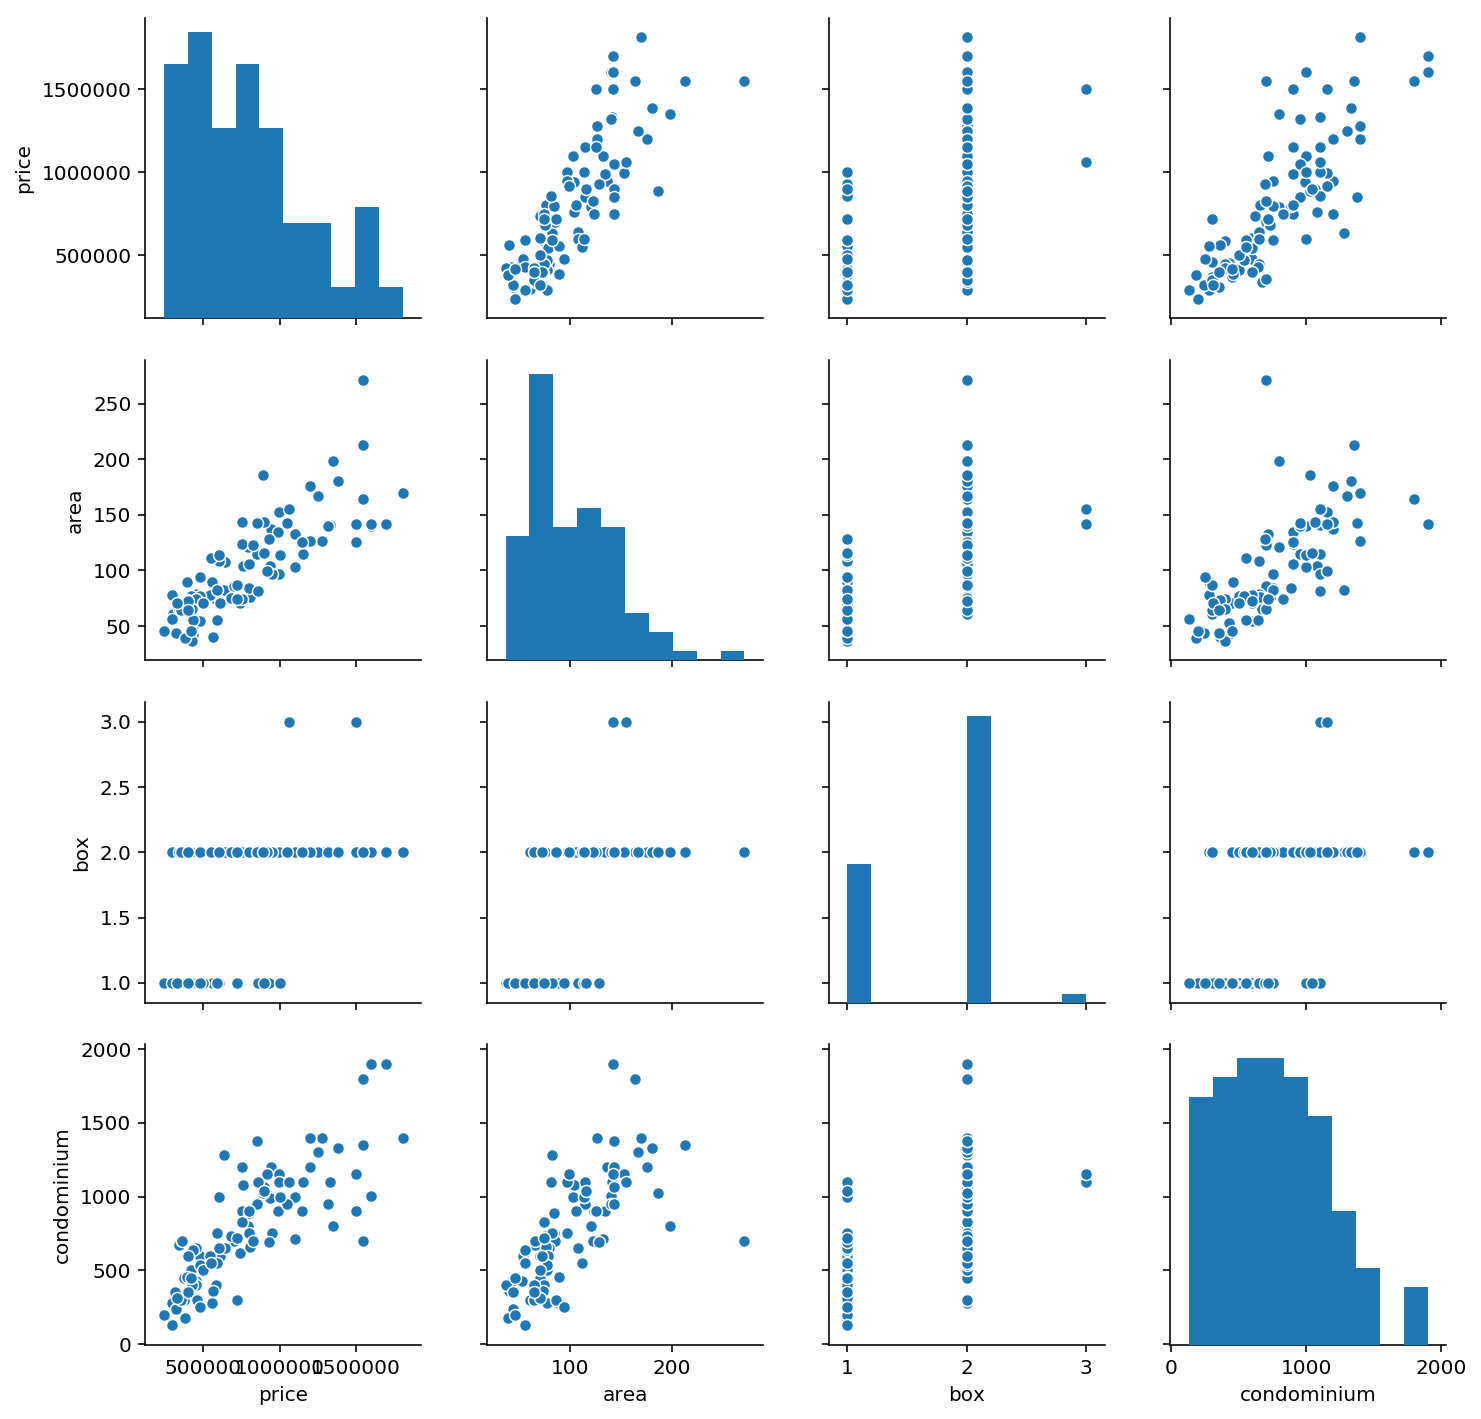

In [417]:
import seaborn as sns
sns.pairplot(df, vars=["price", "area", "box", "condominium"])

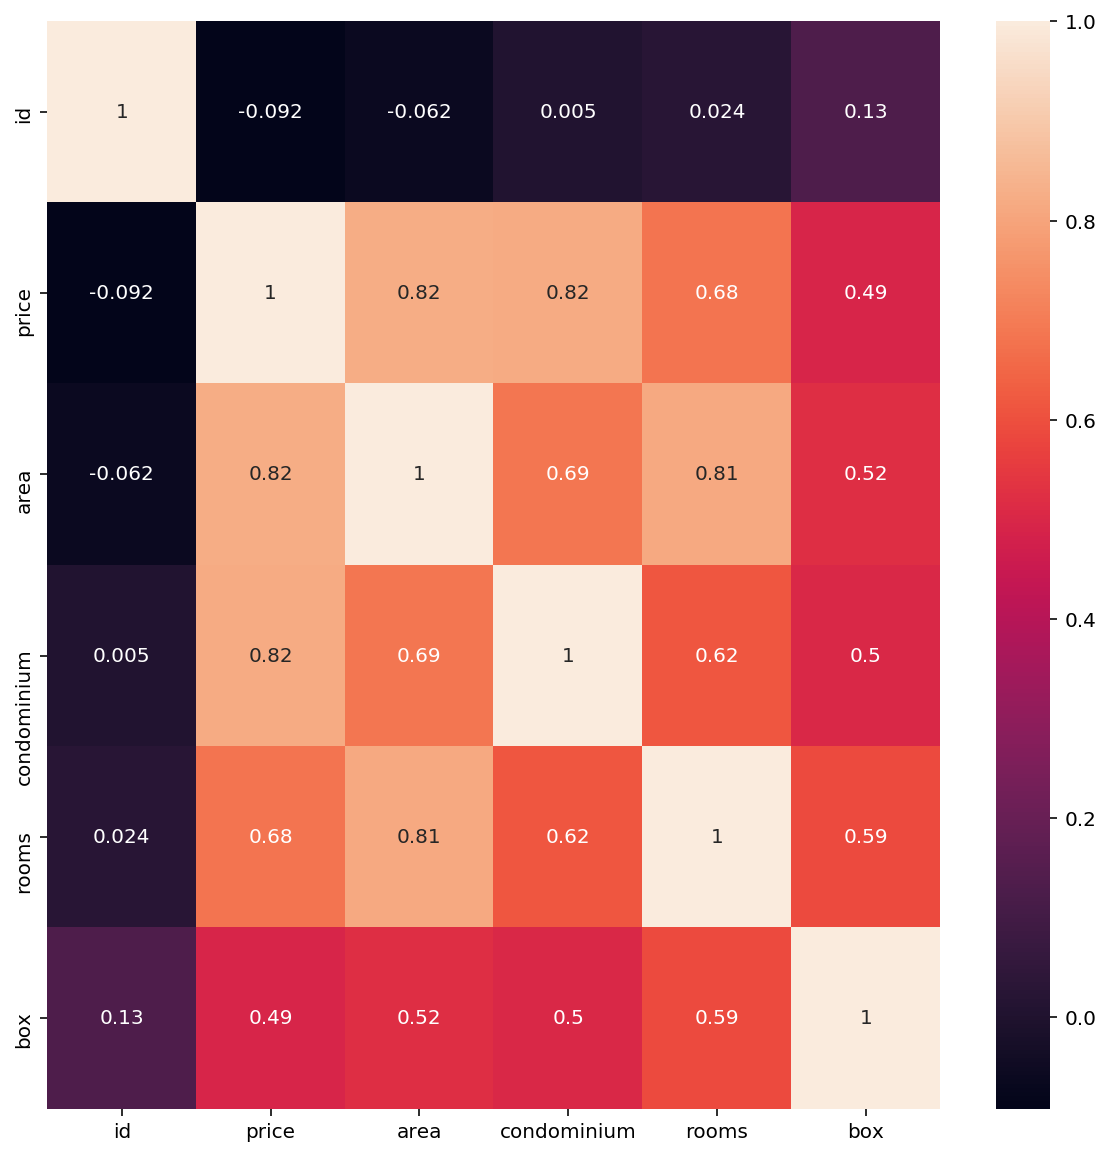

In [418]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True)

'''
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools

trace1 = go.Scatter(
    name='test',
    x = df.area,
    y = df.price,
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace2 = go.Scatter(
    x = np.log(df.area),
    y = np.log(df.price),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('size x price', 'size x price (log)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
#fig.append_trace(trace3, 2, 1)
#fig.append_trace(trace4, 2, 2)



fig['layout'].update(height=600, width=800, title='Stacked subplots')
iplot(fig)
'''

In [419]:
#df.loc[:, 'area':'box']

In [421]:
# para ser utilizado no próximo bloco para selecionar o X
#df.iloc[:, df.columns.get_indexer(features_list)]

In [438]:
#features_list = ['area', 'condominium', 'iptu', 'rooms', 'box']
features_list = ['area', 'condominium', 'rooms']
features = df.iloc[:, df.columns.get_indexer(features_list)]
X = features.values
y = df['price'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))


X.shape: (97, 3) y.shape: (97,)



Número ótimo de atributos : 1


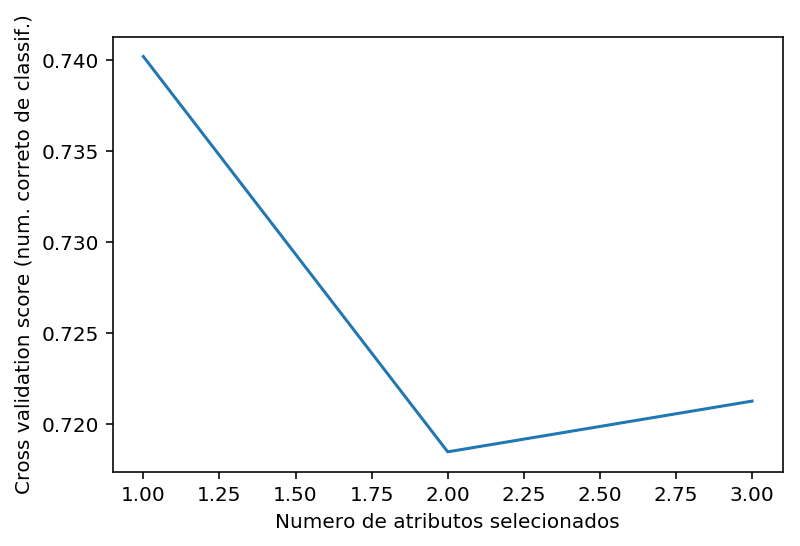

In [439]:
# Identificar a quantidade ótima de atributos
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
#from sklearn.model_selection import StratifiedKFold
clf = RandomForestRegressor(n_estimators=50, random_state=42)
#rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2),
#              scoring='accuracy')
rfecv = RFECV(estimator=clf, step=1)
rfecv.fit(X, y)
print("\nNúmero ótimo de atributos : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de atributos selecionados")
plt.ylabel("Cross validation score (num. correto de classif.)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();

In [440]:
X.shape[1]

3

In [441]:
from sklearn.feature_selection import SelectKBest
from operator import itemgetter
selector = SelectKBest(k=X.shape[1])
selector.fit(X, y)
X_new = selector.transform(X)
print ("\nComposição dos atributos após KBest:", X_new.shape)
features_list_kb = []
for i in selector.get_support(indices=True):
    print (features_list[i], round(selector.scores_[i],2))
    features_list_kb.append([features_list[i], round(selector.scores_[i],2)])

#print selector.get_support(indices=True)
print ("\nAtributos em ordem de importância:")
features_list_kb = sorted(features_list_kb, key=itemgetter(1), reverse=True) 
for sublst in features_list_kb:
    for item in sublst:
        print (item)
    




Composição dos atributos após KBest: (97, 3)
area 2.84
condominium 1.8
rooms 2.76

Atributos em ordem de importância:
area
2.84
rooms
2.76
condominium
1.8


In [442]:
from sklearn.model_selection import train_test_split
#X_train, x_test, Y_train, y_test = train_test_split(df.drop('price', axis=1), df.price)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42)


In [443]:
X_new.shape

(97, 3)

In [444]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))



Training set score: 0.96
Test set score: 0.78


In [445]:
# Este processo se mostrou melhor para escolher os Xs

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: area                 Importance: 0.61
Variable: condominium          Importance: 0.36
Variable: rooms                Importance: 0.02


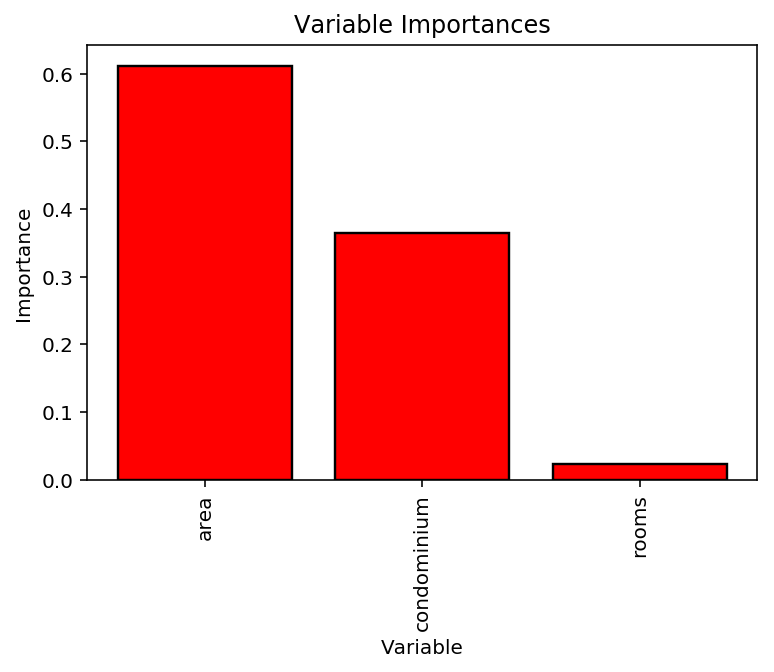

In [446]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

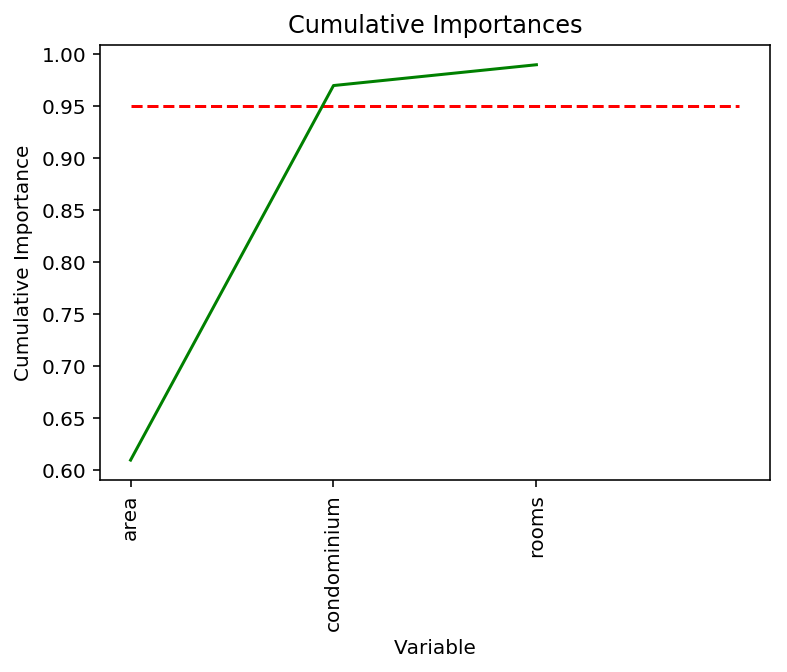

In [447]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [448]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 2


In [449]:
'''
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)
'''

"\n# Extract the names of the most important features\nimportant_feature_names = [feature[0] for feature in feature_importances[0:5]]\n# Find the columns of the most important features\nimportant_indices = [feature_list.index(feature) for feature in important_feature_names]\n# Create training and testing sets with only the important features\nimportant_train_features = train_features[:, important_indices]\nimportant_test_features = test_features[:, important_indices]\n# Sanity check on operations\nprint('Important train features shape:', important_train_features.shape)\nprint('Important test features shape:', important_test_features.shape)\n"

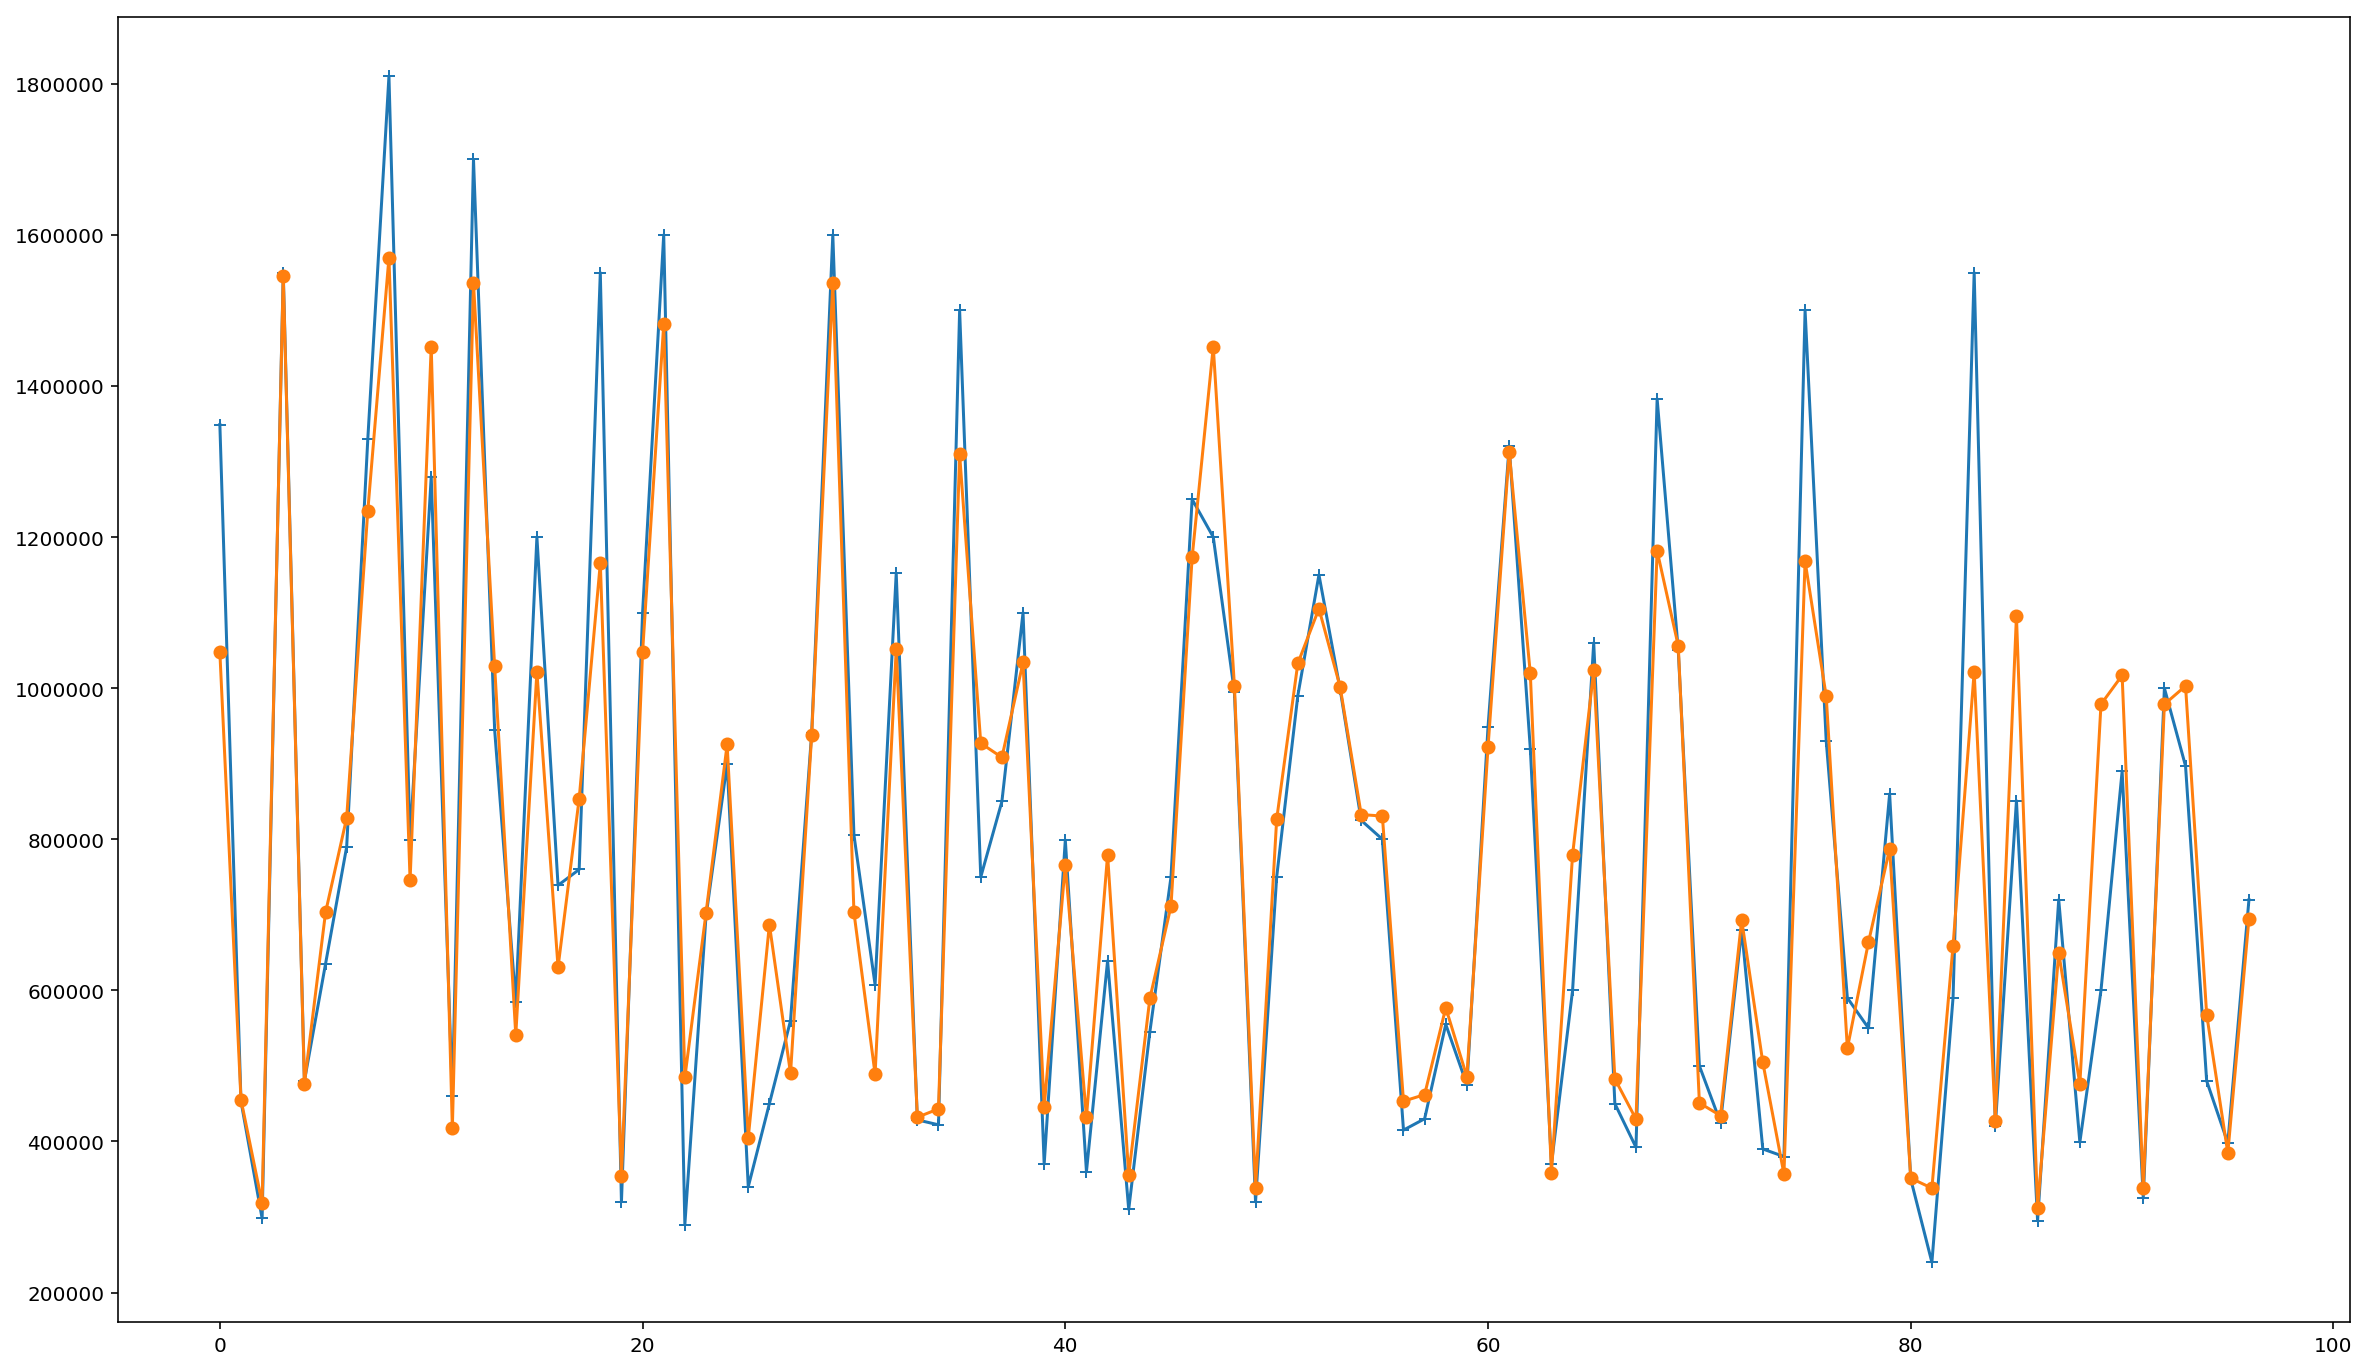

In [450]:
# identificar oportunidades
# gráfico preço ofertado x preço previsto
plt.figure(figsize=(20,12))
prev = (rf.predict(X_new))
plt.plot(range(0, y.shape[0]), y, marker='+')
plt.plot(range(0, prev.shape[0]), prev, marker='o')

## Para prever o preço de um determinado imóvel

In [368]:
# sequência de input para previsão de preço de um imóvel
print (features_list)

['area', 'condominium', 'box', 'rooms']


In [369]:
# prevendo o preço de um imóvel
imovel = [[119, 750, 2]]
prev = int(rf.predict(imovel))
var = 795000 - prev
print (prev)
print (var)
if var < 0:
    print ("Oportunidade com desconto de: {:.2f}%". format(var*100/prev))

    

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 3 

In [370]:
# calcular valores: oportunidades ou super avaliados
df['pred'] = rf.predict(df[['area', 'condominium', 'box']]) # salvar valores preditivos
df['var'] = df['price'] - df['pred'] # salvar diferença preço e preditivo
df['var_p'] = df['var'] * 100 / df['pred'] # salvar a variação percentual

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 3 

In [ ]:
# identificar concorrentes

final_select = df.query("(var < 0 & box == 2. & area > 100. & price < 800000)").sort_values(by='var_p')
final_select


In [ ]:
#salvando csv
final_select.to_csv(('MontSerrat.csv'), sep='\t')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    RandomForestRegressor())


param_grid = {
     'randomforestregressor__n_estimators': [50, 100],
     'randomforestregressor__max_features': [rfecv.n_features_],
     'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    GradientBoostingRegressor())


param_grid = {
    'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'gradientboostingregressor__n_estimators': [50, 100],
    'gradientboostingregressor__max_features': [rfecv.n_features_],
    'gradientboostingregressor__max_depth': [1, 2, 3],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [451]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    AdaBoostRegressor())


param_grid = {
    'adaboostregressor__loss': ['linear', 'square', 'exponential'],
    'adaboostregressor__n_estimators': [50, 100],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

Best cross-validation accuracy: 0.68
Test set score: 0.81
Best parameters: {'adaboostregressor__loss': 'exponential', 'adaboostregressor__n_estimators': 100, 'polynomialfeatures__degree': 2}
MSE: 40569882464.2330
MAE: 165906.6828
EVS: 0.8068


In [452]:
# prevendo o preço de um imóvel
imovel = [[119, 750, 3]]
prev = int(grid.predict(imovel))
var = 795000 - prev
print (prev)
print (var)
if var < 0:
    print ("Oportunidade com desconto de: {:.2f}%". format(var*100/prev))




892538
-97538
Oportunidade com desconto de: -10.93%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    DecisionTreeRegressor())


param_grid = {
    'decisiontreeregressor__criterion': ['mse', 'friedman_mse', 'mae'],
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__max_features': [rfecv.n_features_],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)